<a href="https://colab.research.google.com/github/BrianMoringa/Independent-Project-Core-Week-2/blob/main/DS_Core_Brian_Onchweri_Week_Two_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Defining the Question**
**a) Specifying the Data Analytic Question**

To figure out how we can predict which individuals who are most likely to have or use a bank account. 

**b) Defining the Metric for Success**

Success to us will be finding a strong positive correlation between the variables presented in our dataset

**c) Understanding the context**
We are given a composite dataset collected over few years capturing some meaningful information about respondents

**d) Recording the Experimental Design**

Step1.Read the data
Step2.Do some descriptive analysis of our data
Step3.Clean the data
Step4.Visualize our cleaned data
Step5.Do some Exploratory Data Analysis
Step6.Draw conclusions from our data

**e) Data Relevance**

The data given vaguely captures the relationship we are trying to explain hence more daetailed data is needed for analysis

**Imorting standard Libraries**

In [20]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
Finance_df = pd.read_csv("/content/Financial Dataset - 1.csv")

In [22]:
Finance_df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [23]:
#Getting more info about our data
Finance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [24]:
#Getting some descriptive analysis of our data
Finance_df.describe()

,year,household_size,Respondent Age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


In [25]:
#Checking the shape of our data
Finance_df.shape

(23524, 13)

In [26]:
#Checking if we have any null values in our data
Finance_df.isna().any()

country                    True
year                      False
uniqueid                  False
Has a Bank account         True
Type of Location           True
Cell Phone Access          True
household_size             True
Respondent Age             True
gender_of_respondent       True
The relathip with head     True
marital_status             True
Level of Educuation        True
Type of Job                True
dtype: bool

In [27]:
#I will drop all null values as our analysis will not benefit from those values confirmation can be seen below
Finance_df.dropna(inplace=True)
Finance_df.isna().any()

country                   False
year                      False
uniqueid                  False
Has a Bank account        False
Type of Location          False
Cell Phone Access         False
household_size            False
Respondent Age            False
gender_of_respondent      False
The relathip with head    False
marital_status            False
Level of Educuation       False
Type of Job               False
dtype: bool

In [28]:
#Checking the shape of our data
Finance_df.shape

(23343, 13)

**Observe the shape of our data changing indicating we've gotten rid of null values**

In [29]:
#Checking for Duplicates
Finance_df.duplicated().sum()

0

**We Have no duplicates we can proceed with further analysis**

In [30]:
#Previewing our columns
Finance_df.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

In [31]:
#From the output we note that we have only 3 numeric columns namely; 'year','household_size' and 'Respondent Age
Finance_df.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

In [32]:
# Checking for Anomalies

**Creating custom columns for our analysis**

Has a bank account will be set to 1 and the opposite 0

Gender of respondent male will be set to 1 Female 0

In [33]:
#Since the number of numeric columns we can do statistical analysis on is limited I am going to switch things a little bit
#as follows; 
# gender_of respondent column----replace Male with 1, Female with 0 
# Has a Bank---------------------replace Yes with 1 No with 0
# To help us determine if the gender affected the possibility of one having a bank account or not this will be 
#some sort of Feature Engineering

Finance_df['Has a Bank account'].replace(to_replace='Yes',value=1,inplace=True)
Finance_df['Has a Bank account'].replace(to_replace='No',value=0,inplace=True)
Finance_df['gender_of_respondent'].replace(to_replace='Male',value=1,inplace=True)
Finance_df['gender_of_respondent'].replace(to_replace='Female',value=0,inplace=True)


In [34]:
#Visualizing our Dataset after the Edits
Finance_df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,1,Rural,Yes,3.0,24.0,0,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,0,Rural,No,5.0,70.0,0,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,1,Urban,Yes,5.0,26.0,1,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,0,Rural,Yes,5.0,34.0,0,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,0,Urban,No,8.0,26.0,1,Child,Single/Never Married,Primary education,Informally employed


(array([20046.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  3297.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

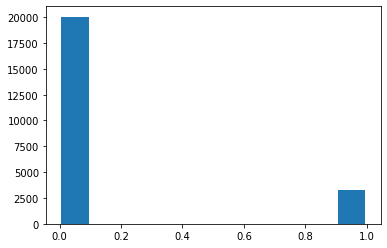

In [35]:
Has_BBank_ac = Finance_df['Has a Bank account']

plt.hist(Has_BBank_ac, bins=10, histtype='bar', rwidth=0.9)

**We observe that we have more Female respondents**

(array([13767.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  9576.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

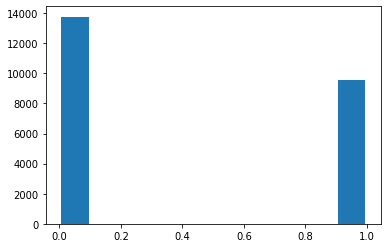

In [36]:
Gender = Finance_df['gender_of_respondent']

plt.hist(Gender, bins=10, histtype='bar', rwidth=0.9)

**For this study we will go ahead and drop unnecessary columns since we dont need them to answer our research question**

In [37]:
#For our research problem year will not be very relevant as  
 

In [38]:

Finance_df['country'].unique

<bound method Series.unique of 0         Kenya
1         Kenya
2         Kenya
3         Kenya
4         Kenya
          ...  
23519    Uganda
23520    Uganda
23521    Uganda
23522    Uganda
23523    Uganda
Name: country, Length: 23343, dtype: object>

In [39]:
Finance_df['year'].unique

<bound method Series.unique of 0        2018
1        2018
2        2018
3        2018
4        2018
         ... 
23519    2018
23520    2018
23521    2018
23522    2018
23523    2018
Name: year, Length: 23343, dtype: int64>

In [40]:
Finance_df['Respondent Age'].max()

100.0

In [41]:
Finance_df['Respondent Age'].min()

16.0

In [42]:
#Finding the range
Age_Range = (Finance_df['Respondent Age'].max()-Finance_df['Respondent Age'].min())
Age_Range

84.0

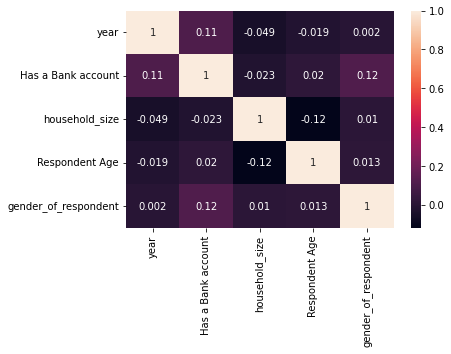

In [43]:
#Plotting a correlation Heat_map to determine which variables closely correlate
#As we can see most values lie on the dark Purple color showing almost no correlation atall
#We will confirm this further by plotting other charts below 
sns.heatmap(Finance_df.corr(),annot=True)
plt.show()

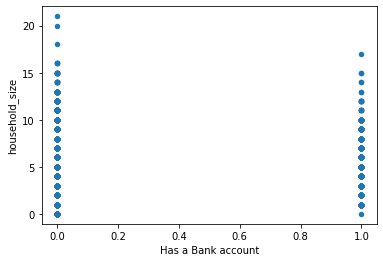

In [44]:
Finance_df.plot(x = 'Has a Bank account', y = 'household_size', kind='scatter')

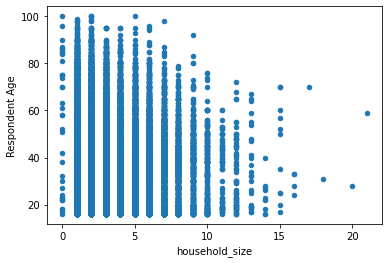

In [45]:
Finance_df.plot(x = 'household_size', y = 'Respondent Age', kind='scatter')

In [46]:
#Since we are more concerned with people with bank accounts, we will go ahead and create a custom dataset with
#only the people with Bank Accounts 

Have_Bank_Ac_df = Finance_df.loc[Finance_df['Has a Bank account']==1]
Have_Bank_Ac_df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,1,Rural,Yes,3.0,24.0,0,Spouse,Married/Living together,Secondary education,Self employed
2,Kenya,2018,uniqueid_3,1,Urban,Yes,5.0,26.0,1,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
8,Kenya,2018,uniqueid_9,1,Rural,Yes,3.0,54.0,1,Head of Household,Married/Living together,Secondary education,Farming and Fishing
11,Kenya,2018,uniqueid_12,1,Rural,Yes,3.0,69.0,1,Head of Household,Married/Living together,Secondary education,Other Income
17,Kenya,2018,uniqueid_18,1,Rural,Yes,6.0,27.0,0,Head of Household,Married/Living together,Secondary education,Self employed


**For Future marketting campaigns Banks can Target People Around 30**

In [47]:
Have_Bank_Ac_df['Respondent Age'].mode()

0    30.0
dtype: float64

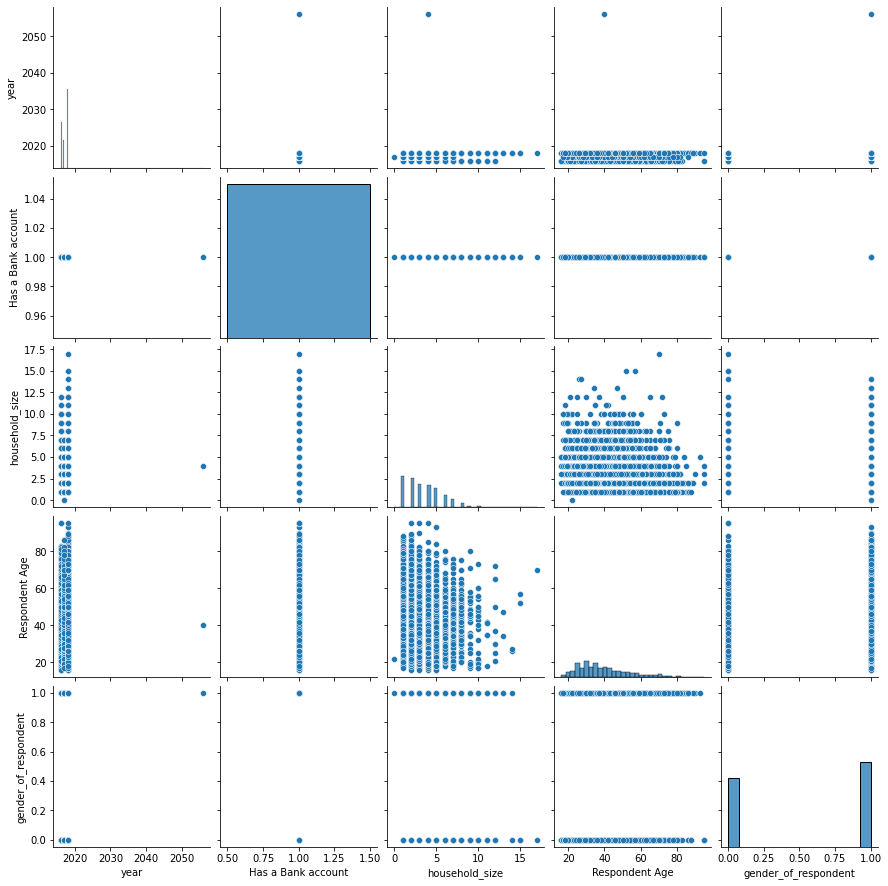

In [48]:
sns.pairplot(Have_Bank_Ac_df)
plt.show()

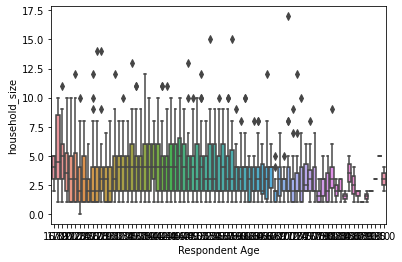

In [50]:
sns.boxplot(x='Respondent Age',y='household_size',data=Have_Bank_Ac_df)

**We observe so many outliers indicating no meaningful relationship between the variables**

In [ ]:


9. Follow up questions

a). Did we have the right data?
b). Do we need other data to answer our question?
c). Did we have the right question?

**f.) Implementing the Solution**

From our findings above theres a srong significance of someone being around the age of 30 and having a bank account

**g.) Challenging the solution**

Having gotten our implementaion above this is not conclusive as other metrics need to be analysed and our data fell short of this

**h.) Follow up questions**

**a). Did we have the right data?**

Yes but was inadequate.

**b). Do we need other data to answer our question?**

Yes we do.

**c). Did we have the right question?** 

Yes we did